This jupyter notebook contains the code for Question Two of our DIS Copenhagen Spring 2025 Complex Networks final project.

In [1]:
!git clone https://github.com/swangtree/instagram_CN_graph.git

Cloning into 'instagram_CN_graph'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 133 (delta 62), reused 104 (delta 37), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 9.02 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Updating files: 100% (55/55), done.


# Research Question 2: Most Important Accounts
AI Disclosure Statement: This implementation was assisted by generative AI. It has been reviewed by humans. Please contact the authors to inquire about the extent of AI usage.

In [2]:
import networkx as nx
import pandas as pd
import os
import glob
import matplotlib
import scipy


In [3]:
## class members
username_dict = {
    "samuel": "swang330",
    "alex": "alex.kalis",
    "alexandra": "alexandrapurdy_",
    "kabir": "kabir_aho",
    "kirin": "kirindanek",
    "liam": "liam_hochman",
    "noah": "noahpurow",
    "seoeun": "seoeunki.m",
    "will": "will.deley",
    "zach": "zach.annuik",
    "yota": "yota.katsikouli",
    "dis_abroad": "dis.copenhagen",
    "ely": "elybrayboy"
}

In [4]:
### construct original network graph
current_dir = os.path.dirname(os.getcwd())
csv_directory = '/content/instagram_CN_graph/csv_files'

output_graph_file = "/content/output/instagram_network.graphml"
# ---

def build_network_from_csvs(csv_dir):
    G = nx.DiGraph()
    csv_files = glob.glob(os.path.join(csv_dir, "*_data.csv"))

    if not csv_files:
        print(f"error: no '*_data.csv' files found in directory: {csv_dir}")
        return None

    print(f"found {len(csv_files)} CSV files to process.")

    for csv_path in csv_files:
        filename = os.path.basename(csv_path)
        print(f"processing: {filename}...")

        parts = filename.replace("_data.csv", "").split('_')
        if len(parts) < 2:
            print(f"warning: skipping file with unexpected name format: {filename}")
            continue

        relationship_type = parts[-1]
        central_node = username_dict["_".join(parts[:-1])]
        print(central_node)

        if relationship_type not in ["followers", "following"]:
            print(f"warning: Skipping file - cannot determine relationship type (expected 'followers' or 'following'): {filename}")
            continue

        if not central_node:
             print(f"warning: Skipping file - could not determine central node: {filename}")
             continue

        G.add_node(central_node)

        try:
            df = pd.read_csv(csv_path)
            if "username" not in df.columns:
                print(f"warning: Skipping file - 'username' column not found in {filename}")
                continue

            other_users = df["username"].dropna().unique()

            for user in other_users:
                G.add_node(user) # Add other user node if it doesn't exist

                if relationship_type == "followers":
                    # Edge from follower (user) to central_node
                    G.add_edge(user, central_node)
                elif relationship_type == "following":
                    # Edge from central_node to the person they follow (user)
                    G.add_edge(central_node, user)

            print(f"-> added {len(other_users)} edges for {central_node} ({relationship_type}).")

        except pd.errors.EmptyDataError:
             print(f"warning: Skipping empty file: {filename}")
        except Exception as e:
            print(f"error processing file {filename}: {e}")

    return G

network_graph = build_network_from_csvs(csv_directory)


print("\n--- Graph Construction Complete ---")
print(f"Number of nodes (users): {network_graph.number_of_nodes()}")
print(f"Number of edges (relationships): {network_graph.number_of_edges()}")


found 26 CSV files to process.
processing: kirin_followers_data.csv...
kirindanek
-> added 824 edges for kirindanek (followers).
processing: yota_following_data.csv...
yota.katsikouli
-> added 185 edges for yota.katsikouli (following).
processing: yota_followers_data.csv...
yota.katsikouli
-> added 147 edges for yota.katsikouli (followers).
processing: samuel_followers_data.csv...
swang330
-> added 683 edges for swang330 (followers).
processing: noah_followers_data.csv...
noahpurow
-> added 789 edges for noahpurow (followers).
processing: will_followers_data.csv...
will.deley
-> added 631 edges for will.deley (followers).
processing: dis_abroad_following_data.csv...
dis.copenhagen
-> added 240 edges for dis.copenhagen (following).
processing: kabir_following_data.csv...
kabir_aho
-> added 2346 edges for kabir_aho (following).
processing: liam_following_data.csv...
liam_hochman
-> added 1678 edges for liam_hochman (following).
processing: ely_following_data.csv...
elybrayboy
-> added 14

### Attempt 1: Class members with highest in-degrees

In [ ]:
# most popular accounts
# get (node, in_degree) for every node
in_degrees = network_graph.in_degree()

# sort descending by degree
top = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:50]

# print them
for node, deg in top:
    print(f"{node:20s}  in-degree: {deg}")


dis.copenhagen        in-degree: 4857
alex.kalis            in-degree: 1235
seoeunki.m            in-degree: 1136
elybrayboy            in-degree: 892
kabir_aho             in-degree: 828
kirindanek            in-degree: 825
liam_hochman          in-degree: 817
noahpurow             in-degree: 789
alexandrapurdy_       in-degree: 711
swang330              in-degree: 685
will.deley            in-degree: 631
zach.annuik           in-degree: 604
yota.katsikouli       in-degree: 147
disabroad             in-degree: 7
ye                    in-degree: 7
livingstonfootballclub  in-degree: 4
kingjames             in-degree: 4
champagnepapi         in-degree: 4
baybater              in-degree: 3
3liana_mn             in-degree: 3
guslafave             in-degree: 3
memezar               in-degree: 3
_anders_hansen        in-degree: 3
elijahaharris         in-degree: 3
travisscott           in-degree: 3
21savage              in-degree: 3
bronny                in-degree: 3
snoopdogg             in

### Attempt 2: hubs and authorities


In [5]:
B = nx.Graph()

In [ ]:
# Mark workspace members
workspace_handles = set(username_dict.values())
for user in workspace_handles:
    B.add_node(user, bipartite='L')

# For every directed follow-edge A→B in your original graph:
for follower, followed in network_graph.edges():
    # Case 1: workspace member follows a non‐member
    if follower in workspace_handles and followed not in workspace_handles:
        B.add_node(followed, bipartite='R')
        B.add_edge(follower, followed)
    # Case 2: non‐member follows a workspace member
    elif followed in workspace_handles and follower not in workspace_handles:
        B.add_node(follower, bipartite='R')
        B.add_edge(follower, followed)


In [ ]:
import networkx as nx

hubs, authorities = nx.hits(network_graph, max_iter=1000, tol=1e-08, normalized=True)

# 3. Filter out just the R‐nodes
R_nodes = [n for n, d in B.nodes(data=True) if d.get('bipartite') == 'R']

# 4. Sort and display the top 10 hubs and top 10 authorities among R
top_hubs  = sorted(((n, hubs[n])  for n in R_nodes), key=lambda x: x[1], reverse=True)[:10]
top_auths = sorted(((n, authorities[n]) for n in R_nodes), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Hubs (R side):")
for n, score in top_hubs:
    print(f"  {n:20s} {score:.4e}")

print("\nTop 10 Authorities (R side):")
for n, score in top_auths:
    print(f"  {n:20s} {score:.4e}")


Top 10 Hubs (R side):
  3liana_mn            2.0735e-04
  will.b.lambert       2.0684e-04
  anderss.k            2.0668e-04
  ella.sheidley        2.0652e-04
  itzkim_y             2.0626e-04
  oliviamatlaga        2.0626e-04
  laney.mcd            2.0626e-04
  adrianwclement       2.0604e-04
  kayln_               2.0604e-04
  matthew.grossman     2.0584e-04

Top 10 Authorities (R side):
  disabroad            3.2200e-04
  ye                   2.3959e-04
  kingjames            2.3031e-04
  uwbadgers            2.2595e-04
  ben_mun_             2.1753e-04
  brndayle             2.1268e-04
  clairo               1.9907e-04
  _anders_hansen       1.9893e-04
  mette.mck            1.9887e-04
  kate_a.s             1.9478e-04


### Attempt 3: Betweenness centrality on bipartite graph

In [ ]:
# Compute betweenness centrality on the bipartite graph considering
# only class memberes
bc = nx.betweenness_centrality_subset(
    B,
    sources=list(workspace_handles),
    targets=list(workspace_handles),
    normalized=True
)



In [ ]:
# 3. Extract and sort only the non‐workspace nodes by centrality
r_nodes = [(node, bc_val)
           for node, bc_val in bc.items()
           if B.nodes[node]['bipartite']=='R']
r_nodes.sort(key=lambda x: x[1], reverse=True)

# 4. Peek at your top connectors
top_connectors = r_nodes[:30]
for handle, centrality in top_connectors:
    print(f"{handle:20s}  {centrality:.4e}")

disabroad             6.7997e-08
ye                    2.8524e-08
livingstonfootballclub  1.2681e-08
kingjames             6.6909e-09
itzkim_y              5.8695e-09
baybater              5.4852e-09
mette.mck             4.4821e-09
brndayle              4.4565e-09
shaoyxx               4.2002e-09
champagnepapi         3.6370e-09
anderss.k             3.6100e-09
uwbadgers             3.6036e-09
oliviamatlaga         2.9891e-09
laney.mcd             2.9891e-09
lillieofthesky        2.9669e-09
alexpicoult           2.9669e-09
matthew.grossman      2.7643e-09
3liana_mn             2.7420e-09
soph.zwu              2.6979e-09
clairo                2.5692e-09
lukas_stoker          2.5579e-09
lindsayeisenman       2.5579e-09
dnedtr                2.5274e-09
_anders_hansen        2.4341e-09
michael.shaari        2.3754e-09
guslafave             2.3754e-09
elijahaharris         2.3467e-09
lylahaikoye           2.2879e-09
noeldeyzel_bodybuilder  2.2746e-09
cbum                  2.2746e-09


In [ ]:
# B is bipartite Graph, and username_dict as before
workspace_handles = set(username_dict.values())

# list of target accounts you care about
#interesting_accounts = [handle for handle, _ in top_connectors]
interesting_accounts = ['yota.katsikouli']

for member in workspace_handles:
    for target in interesting_accounts:
        if member == target:
            continue  # skip if member and target are the same
        try:
            path = nx.shortest_path(B, source=member, target=target)
            print(f"{member:12s} → {target:12s} :  {'  →  '.join(path)}")
        except nx.NetworkXNoPath:
            print(f"{member:12s} → {target:12s} :  no path")

elybrayboy   → yota.katsikouli :  elybrayboy  →  bensolliday  →  alex.kalis  →  disabroad  →  yota.katsikouli
kirindanek   → yota.katsikouli :  kirindanek  →  mette.mck  →  alexandrapurdy_  →  disabroad  →  yota.katsikouli
liam_hochman → yota.katsikouli :  liam_hochman  →  disabroad  →  yota.katsikouli
alex.kalis   → yota.katsikouli :  alex.kalis  →  disabroad  →  yota.katsikouli
alexandrapurdy_ → yota.katsikouli :  alexandrapurdy_  →  disabroad  →  yota.katsikouli
noahpurow    → yota.katsikouli :  noahpurow  →  disabroad  →  yota.katsikouli
zach.annuik  → yota.katsikouli :  zach.annuik  →  disabroad  →  yota.katsikouli
swang330     → yota.katsikouli :  swang330  →  oliviamatlaga  →  alexandrapurdy_  →  disabroad  →  yota.katsikouli
seoeunki.m   → yota.katsikouli :  seoeunki.m  →  disabroad  →  yota.katsikouli
dis.copenhagen → yota.katsikouli :  dis.copenhagen  →  jordynmosc  →  alexandrapurdy_  →  disabroad  →  yota.katsikouli
will.deley   → yota.katsikouli :  will.deley  →  pranshude

## three-partition graph with synthetic edges R-R

In [5]:
# use graph network_graph from above
import networkx as nx

def make_bipartite_copy(G, workspace_handles):
    """
    Given a directed graph G and a set of L-nodes (workspace_handles),
    returns a copy with all L->L or L<-L edges removed to ensure bipartiteness.
    """
    L_set = set(workspace_handles)
    G_bipartite = G.copy()

    # Remove all edges u->v where both u and v are in L
    edges_to_remove = [(u, v) for u, v in G_bipartite.edges() if u in L_set and v in L_set]
    G_bipartite.remove_edges_from(edges_to_remove)

    print(f"Removed {len(edges_to_remove):,} L→L or L←L edges.")
    for node in G_bipartite.nodes():
        if node in workspace_handles:
            G_bipartite.nodes[node]['bipartite'] = 'L'
        else:
            G_bipartite.nodes[node]['bipartite'] = 'R'

    return G_bipartite
workspace_handles = set(username_dict.values())
B = make_bipartite_copy(network_graph, workspace_handles)



Removed 109 L→L or L←L edges.


In [6]:
lr = 0
rl = 0

for u, v in B.edges():
    if B.nodes[u]['bipartite']=='L':
        lr += 1
    else:
        rl += 1

In [7]:
print(lr)
print(rl)

15781
14048


In [8]:
def generate_zhou_weights_streaming(bipartite_edges, L_nodes, R_nodes):
    from collections import defaultdict

    # Build neighbor sets and degree counts
    neighbors_L = defaultdict(set)
    k_R = defaultdict(int)

    for u, v in bipartite_edges:
        if u in L_nodes:
            neighbors_L[u].add(v)
            k_R[v] += 1

    k_L = {u: len(neighbors_L[u]) for u in neighbors_L}

    # Yield each weight contribution as it's computed
    for u in L_nodes:
        neighbors = list(neighbors_L[u])
        for i in range(len(neighbors)):
            for j in range(len(neighbors)):
                if i == j:
                    continue
                r_i, r_j = neighbors[i], neighbors[j]
                if k_L[u] > 0 and k_R[r_j] > 0:
                    w = 1 / (k_L[u] * k_R[r_j])
                    yield ((r_i, r_j), w)

In [ ]:
import heapq
### memory efficient method to select approximated top max_edges weights
def keep_top_weights_streaming(R_weights_generator, max_edges=11_000_000):

    min_heap = []  # stores (weight, (i, j))

    for (i, j), w in R_weights_generator:
        if len(min_heap) < max_edges:
            heapq.heappush(min_heap, (w, (i, j)))
        else:
            heapq.heappushpop(min_heap, (w, (i, j)))  # replace smallest if w is bigger

    # Convert heap to dictionary
    return {pair: weight for weight, pair in min_heap}


In [9]:
from collections import defaultdict
import heapq
# memory inefficient, exact weights
def keep_top_weights_accumulated(R_weights_generator, max_edges=11_000_000):
    """
    Accumulate Zhou weights for each (i, j) and keep only the top max_edges.

    Args:
        R_weights_generator: yields ((i, j), w) contributions one at a time
        max_edges: how many top weighted edges to keep

    Returns:
        A dictionary {(i, j): total_weight} for the top-N edges
    """
    # Step 1: Accumulate all weights per (i, j)
    weight_totals = defaultdict(float)
    for (i, j), w in R_weights_generator:
        weight_totals[(i, j)] += w

    # Step 2: Keep only the top-N weights using a heap
    min_heap = []
    for (i, j), total_weight in weight_totals.items():
        if len(min_heap) < max_edges:
            heapq.heappush(min_heap, (total_weight, (i, j)))
        else:
            heapq.heappushpop(min_heap, (total_weight, (i, j)))

    # Step 3: Convert heap to final dictionary
    return {pair: weight for weight, pair in min_heap}


In [10]:
def construct_tripartite_graph(bipartite_edges, L_nodes, R_nodes, R_weights, tau):
    """
    Constructs a tripartite graph with:
        - L -> R        (original bipartite edges)
        - R -> R        (synthetic edges where w_ij > tau)
        - R -> L'       (copied from original R -> L edges)
    Removes:
        - original R -> L edges (handled by R -> L' copying)
    """
    G = nx.DiGraph()
    L_prime_nodes = {f"{l}'" for l in L_nodes}

    # Add nodes
    G.add_nodes_from(L_nodes, bipartite='L')
    G.add_nodes_from(R_nodes, bipartite='R')
    G.add_nodes_from(L_prime_nodes, bipartite='L_prime')

    # Add L->R and R-> L'
    for u, v in bipartite_edges:
        if u in L_nodes and v in R_nodes:
            G.add_edge(u, v)
        elif u in R_nodes and v in L_nodes:
            G.add_edge(u, f"{v}'")  # Add R -> L' edge


    G.add_edges_from([(u, v) for u, v in bipartite_edges if u in L_nodes and v in R_nodes])

    # Add synthetic R -> R edges
    for (i, j), w in R_weights.items():
        if w > tau:
            G.add_edge(i, j)

    # Validate: No invalid edges like R->L or L->L'
    for u, v in list(G.edges()):
        if (u in R_nodes and v in L_nodes) or (u in L_nodes and v in L_prime_nodes):
            print(f"⚠️ Invalid edge detected: {u} -> {v}")

    return G


In [ ]:
import matplotlib.pyplot as plt

def plot_weight_distribution(R_weights, log_scale=False, bins=100):
    weights = list(R_weights.values())

    plt.figure(figsize=(8, 5))
    plt.hist(weights, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel("Edge Weight (w_ij)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Distribution of R→R Weights (Zhou Projection)", fontsize=14)

    if log_scale:
        plt.yscale("log")
        plt.ylabel("Frequency (log scale)")

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [11]:
!pip install kneed

In [19]:
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

def find_tau_knee_robust(R_weights_refined, top_trim=0.01, bottom_trim=0.10, plot=True):
    sorted_weights = sorted(R_weights_refined.values(), reverse=True)
    n = len(sorted_weights)

    # Trim top and bottom percentiles
    start = int(n * top_trim)
    end = int(n * (1 - bottom_trim))
    trimmed_weights = sorted_weights[start:end]
    x = list(range(start, end))
    y = trimmed_weights

    if len(y) < 10:
        print("Warning: Not enough data after trimming to find a knee.")
        return None

    # Apply KneeLocator
    kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')

    tau = y[kneedle.knee - start] if kneedle.knee is not None else None

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(range(n), sorted_weights, label="All Weights", color='lightgray')
        plt.plot(x, y, label="Trimmed Weights", color='blue')
        if tau is not None:
            plt.axhline(tau, color='red', linestyle='--', label=f"τ = {tau:.4e}")
        plt.xlabel("Rank")
        plt.ylabel("Weight")
        plt.title("Robust Knee Detection for R→R Weights")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return tau


In [ ]:
# memory-efficient but approximated weights
stream = generate_zhou_weights_streaming(B.edges(), workspace_handles, set(B.nodes()) - workspace_handles)
R_weights_refined = keep_top_weights_streaming(stream, max_edges=11_000_000) ### 11,000,000 approximated extremely conservatively

In [12]:
# exact weights, but memory-inefficient
stream = generate_zhou_weights_streaming(B.edges(), workspace_handles, set(B.nodes()) - workspace_handles)
R_weights_refined = keep_top_weights_accumulated(stream, max_edges=11_000_000)



In [13]:
# either calculate weights or import via pickle
weights = R_weights_refined

In [ ]:
import pickle
### save weights with pickle
with open("/content/weights.pkl", "wb") as f:
    pickle.dump(R_weights_refined, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Weights saved to /content/weights.pkl")


Weights saved to /content/weights.pkl


In [ ]:
import pickle
### load weights, if already computed
with open("/content/weights.pkl", "rb") as f:
    weights = pickle.load(f)

UnpicklingError: pickle data was truncated

KeyboardInterrupt: 

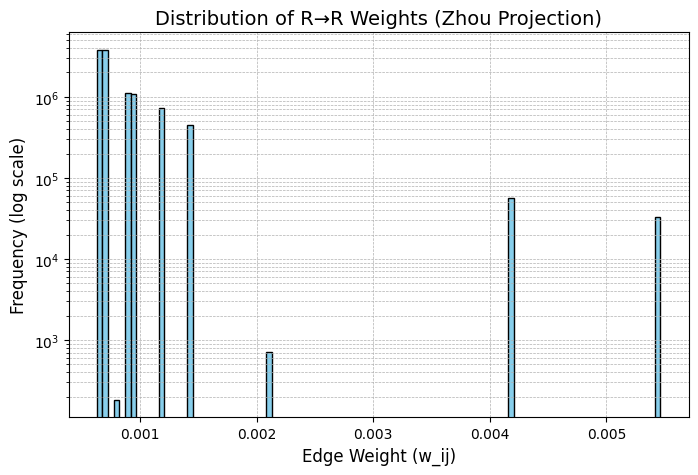

In [ ]:
plot_weight_distribution(weights, log_scale=True)

In [14]:
# EDA on top 11million synthetic R-R weights
import numpy as np
tau_99 = np.percentile(list(weights.values()), 99)
tau_95 = np.percentile(list(weights.values()), 95)
tau_90 = np.percentile(list(weights.values()), 90)
print(f"99th: {tau_99:.4f}, 95th: {tau_95:.4f}, 90th: {tau_90:.4f}")

99th: 0.0014, 95th: 0.0012, 90th: 0.0012


In [ ]:
# calculate tau via KneeLocator https://pypi.org/project/kneed
## should be run on full weights array, not top max_edges. Difficult for memory.
tau = find_tau_knee_robust(weights)
print(f"τ = {tau:.6f}")

In [15]:
tau = tau_90

count_above_tau = sum(1 for w in R_weights_refined.values() if w > tau)
print(f"Number of R→R weights above τ = {tau:.6f}: {count_above_tau}")

R_nodes_count = len(set(B.nodes()) - workspace_handles)
total_weights = (R_nodes_count * (R_nodes_count - 1)) ## original number of weights
percent = 100 * count_above_tau / total_weights

print(f"{count_above_tau:,} out of {total_weights:,} weights ({percent:.2f}%) are above τ.")


Number of R→R weights above τ = 0.001166: 541860
541,860 out of 481,253,906 weights (0.11%) are above τ.


In [16]:
T = construct_tripartite_graph(B.edges(), workspace_handles, set(B.nodes()) - workspace_handles, weights, tau)

In [17]:
# --- Compute summary statistics ---
num_nodes = T.number_of_nodes()
num_edges = T.number_of_edges()
density_undirected = nx.density(T.to_undirected())

# Partition counts
L_nodes  = [n for n, d in T.nodes(data=True) if d.get('bipartite') == 'L']
R_nodes  = [n for n, d in T.nodes(data=True) if d.get('bipartite') == 'R']
Lp_nodes = [n for n, d in T.nodes(data=True) if d.get('bipartite') == "L_prime"]

num_L  = len(L_nodes)
num_R  = len(R_nodes)
num_Lp = len(Lp_nodes)


# Initialize counters
rr_edges = 0
lr_edges = 0
rlp_edges = 0
# edges count
for u, v in T.edges():
    if u in R_nodes and v in R_nodes:
        rr_edges += 1
    elif u in L_nodes and v in R_nodes:
        lr_edges += 1
    elif u in R_nodes and v in Lp_nodes:
        rlp_edges += 1

# Degree stats
degrees   = dict(T.degree())
avg_degree = sum(degrees.values()) / num_nodes
max_degree = max(degrees.values())
min_degree = min(degrees.values())


In [18]:
# clustering & components on undirected version
#U          = G.to_undirected()
#avg_clust  = nx.average_clustering(U)
#components = list(nx.connected_components(U))
#n_comps    = len(components)
#largest_cc = max(len(c) for c in components)

# --- 3. Print summary ---
print(f"Total nodes:               {num_nodes}")
print(f"  L nodes (workspace):     {num_L}")
print(f"  R nodes (non-workspace): {num_R}")
print(f"  L' nodes (copies):       {num_Lp}\n")

print(f"Total edges:               {num_edges}")
print(f"R → R edges (synthetic):     {rr_edges:,}")
print(f"L → R edges:     {lr_edges:,}")
print(f"R → L′ edges:    {rlp_edges:,}")


Total nodes:               21964
  L nodes (workspace):     13
  R nodes (non-workspace): 21938
  L' nodes (copies):       13

Total edges:               571689
R → R edges (synthetic):     541,860
L → R edges:     15,781
R → L′ edges:    14,048


In [19]:
### get betweenness centrality from L->L'
import networkx as nx

# 1. Identify your partitions
L_nodes   = [n for n,d in T.nodes(data=True) if d.get('bipartite') == 'L']
Lp_nodes  = [n for n,d in T.nodes(data=True) if d.get('bipartite') == "L_prime"]
R_nodes   = [n for n,d in T.nodes(data=True) if d.get('bipartite') == 'R']

# 2. Compute L→L' betweenness
#    This explores only shortest paths from every L in L_nodes to every L' in Lp_nodes
bc_subset = nx.betweenness_centrality_subset(
    T,
    sources=L_nodes,
    targets=Lp_nodes,
    normalized=True  # set False if you want raw counts
)

# 3. Extract and rank only the R-side scores
r_scores = [(r, bc_subset[r]) for r in R_nodes]
r_scores.sort(key=lambda x: x[1], reverse=True)

# 4. Print top 10 most “bridging” non-members with degree info
print("Top 10 R-nodes by L→L' betweenness:")
print(f"{'Node':20s} {'Betweenness':>12s} {'InDeg':>6s} {'OutDeg':>6s}")

for r, score in r_scores[:10]:
    indeg = T.in_degree(r)
    outdeg = T.out_degree(r)
    print(f"{r:20s} {score:12.4e} {indeg:6d} {outdeg:6d}")



Top 10 R-nodes by L→L' betweenness:
Node                  Betweenness  InDeg OutDeg
disabroad              1.2439e-08      7    182
anderss.k              5.2203e-09      2      4
livingstonfootballclub   4.9065e-09      4    654
ye                     4.9065e-09      7    654
itzkim_y               4.4203e-09      2      3
will.b.lambert         4.3782e-09      2      3
sally.bornhorst        4.2365e-09    239    240
lylahaikoye            4.1543e-09      2    654
_anders_hansen         4.1529e-09      3      2
mindy.kimm             4.1524e-09      2      2


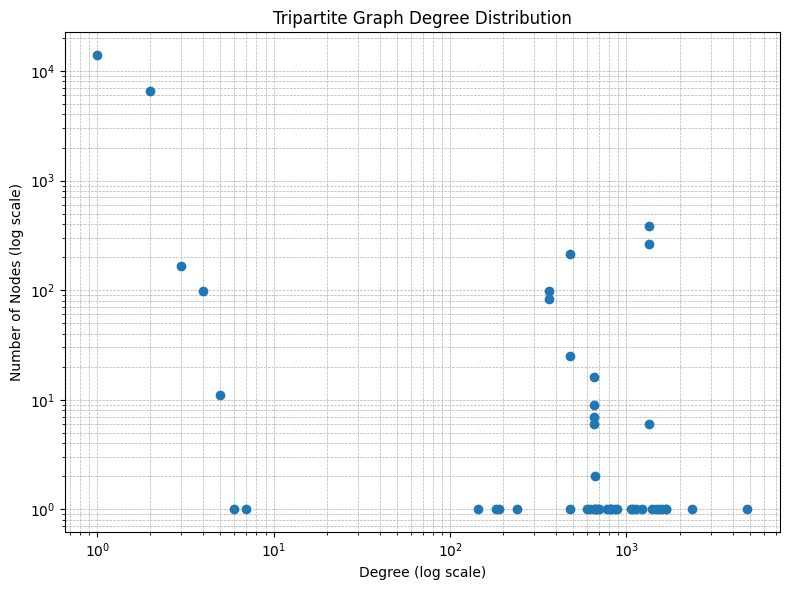

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_degree_distribution_loglog(G, title="Degree Distribution (Log-Log)"):
    degrees = [G.degree(n) for n in G.nodes()]

    # Count how many nodes have each degree
    degree_counts = {}
    for d in degrees:
        degree_counts[d] = degree_counts.get(d, 0) + 1

    x = np.array(list(degree_counts.keys()))
    y = np.array(list(degree_counts.values()))

    # Sort for cleaner plotting
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.loglog(x, y, marker='o', linestyle='none')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Number of Nodes (log scale)")
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
plot_degree_distribution_loglog(T, title="Tripartite Graph Degree Distribution")


In [21]:
# assume T is your tripartite Graph, and username_dict as before
workspace_handles = set(username_dict.values())

# list of target accounts you care about
#interesting_accounts = [handle for handle, _ in top_connectors]
interesting_accounts = ['anderss.k', 'itzkim_y']

for member in workspace_handles:
    for target in interesting_accounts:
        if member == target:
            continue  # skip if member and target are the same
        try:
            path = nx.shortest_path(T, source=member, target=target)
            print(f"{member:12s} → {target:12s} :  {'  →  '.join(path)}")
        except nx.NetworkXNoPath:
            print(f"{member:12s} → {target:12s} :  no path")

noahpurow    → anderss.k    :  no path
noahpurow    → itzkim_y     :  no path
zach.annuik  → anderss.k    :  no path
zach.annuik  → itzkim_y     :  no path
liam_hochman → anderss.k    :  no path
liam_hochman → itzkim_y     :  no path
yota.katsikouli → anderss.k    :  no path
yota.katsikouli → itzkim_y     :  no path
alex.kalis   → anderss.k    :  no path
alex.kalis   → itzkim_y     :  no path
elybrayboy   → anderss.k    :  no path
elybrayboy   → itzkim_y     :  elybrayboy  →  itzkim_y
seoeunki.m   → anderss.k    :  no path
seoeunki.m   → itzkim_y     :  no path
will.deley   → anderss.k    :  no path
will.deley   → itzkim_y     :  no path
alexandrapurdy_ → anderss.k    :  no path
alexandrapurdy_ → itzkim_y     :  no path
dis.copenhagen → anderss.k    :  no path
dis.copenhagen → itzkim_y     :  no path
kirindanek   → anderss.k    :  kirindanek  →  anderss.k
kirindanek   → itzkim_y     :  no path
kabir_aho    → anderss.k    :  kabir_aho  →  anderss.k
kabir_aho    → itzkim_y     :  no path